# Heart Disease EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('heart_disease.csv')
df.shape

(10000, 21)

In [4]:
# Sumário 

def summary(df):
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)

,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
Age,float64,29,0.0029,0,63,9971,18.0,80.0,49.296259,18.19397,56.0,69.0,46.0
Gender,object,19,0.0019,0,2,9981,NaN,NaN,NaN,NaN,Male,Female,Male
Blood Pressure,float64,19,0.0019,0,61,9981,120.0,180.0,149.75774,17.572969,153.0,146.0,126.0
Cholesterol Level,float64,30,0.0030,0,151,9970,150.0,300.0,225.425577,43.575809,155.0,286.0,216.0
Exercise Habits,object,25,0.0025,0,3,9975,NaN,NaN,NaN,NaN,High,High,Low
Smoking,object,25,0.0025,0,2,9975,NaN,NaN,NaN,NaN,Yes,No,No
Family Heart Disease,object,21,0.0021,0,2,9979,NaN,NaN,NaN,NaN,Yes,Yes,No
Diabetes,object,30,0.0030,0,2,9970,NaN,NaN,NaN,NaN,No,Yes,No
BMI,float64,22,0.0022,0,9978,9978,18.002837,39.996954,29.077269,6.307098,24.991591,25.221799,29.855447
High Blood Pressure,object,26,0.0026,0,2,9974,NaN,NaN,NaN,NaN,Yes,No,No


In [5]:
# limpeza e pre-processamneto de dados
df = df.dropna()

print('Valores faltantes após limpeza:')
print(df.isnull().sum())

Valores faltantes após limpeza:
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64


### Outras opções de tratamento de dados poderia ser:
**Para colunas numéricas:**
```
colunas_num = df.select_dtypes(include=['float64', 'int64']).columns
df[colunas_num] = df[colunas_num].fillna(df[colunas_num].mean())
```
**Para colunas Categóricas:**
```
colunas_cat = df.select_dtypes(include=['object']).columns
df[colunas_cat] = df[colunas_cat].fillna(df[colunas_cat].mode().iloc[0])
```

In [14]:
# Procurando outliers
for col in colunas_numericas:
    Q1 = df[col].quantile(0.25)  
    Q3 = df[col].quantile(0.75) 
    IQR = Q3 - Q1  
    
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR  
    
   
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'{col} coluna: {len(outliers)} outliers')

Age coluna: 0 outliers
Blood Pressure coluna: 0 outliers
Cholesterol Level coluna: 0 outliers
BMI coluna: 0 outliers
Sleep Hours coluna: 0 outliers
Triglyceride Level coluna: 0 outliers
Fasting Blood Sugar coluna: 0 outliers
CRP Level coluna: 0 outliers
Homocysteine Level coluna: 0 outliers


## Análise de Dados Exploratória - EDA

In [6]:
print('Sumário estatístico para dados numéricos :')
display(df.describe())

Sumário estatístico para dados numéricos :


,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000
mean,49.343579,149.806737,225.295474,29.058061,6.987953,250.401474,120.085684,7.465867,12.444907
std,18.213004,17.574252,43.613240,6.293950,1.752257,87.133374,23.607224,4.342865,4.317252
min,18.000000,120.000000,150.000000,18.007058,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.652554,5.448099,176.000000,99.000000,3.666790,8.720590
50%,49.000000,150.000000,225.000000,29.058722,6.998945,250.000000,120.000000,7.464446,12.390041
75%,65.000000,165.000000,263.000000,34.479031,8.531765,326.000000,141.000000,11.239630,16.120527
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [7]:
colunas_categoricas = df.select_dtypes(include = object)
colunas_numericas = df.select_dtypes(include = float)

print("Colunas Categóricas: ", colunas_categoricas.columns.value_counts().sum())

Colunas Categóricas:  12


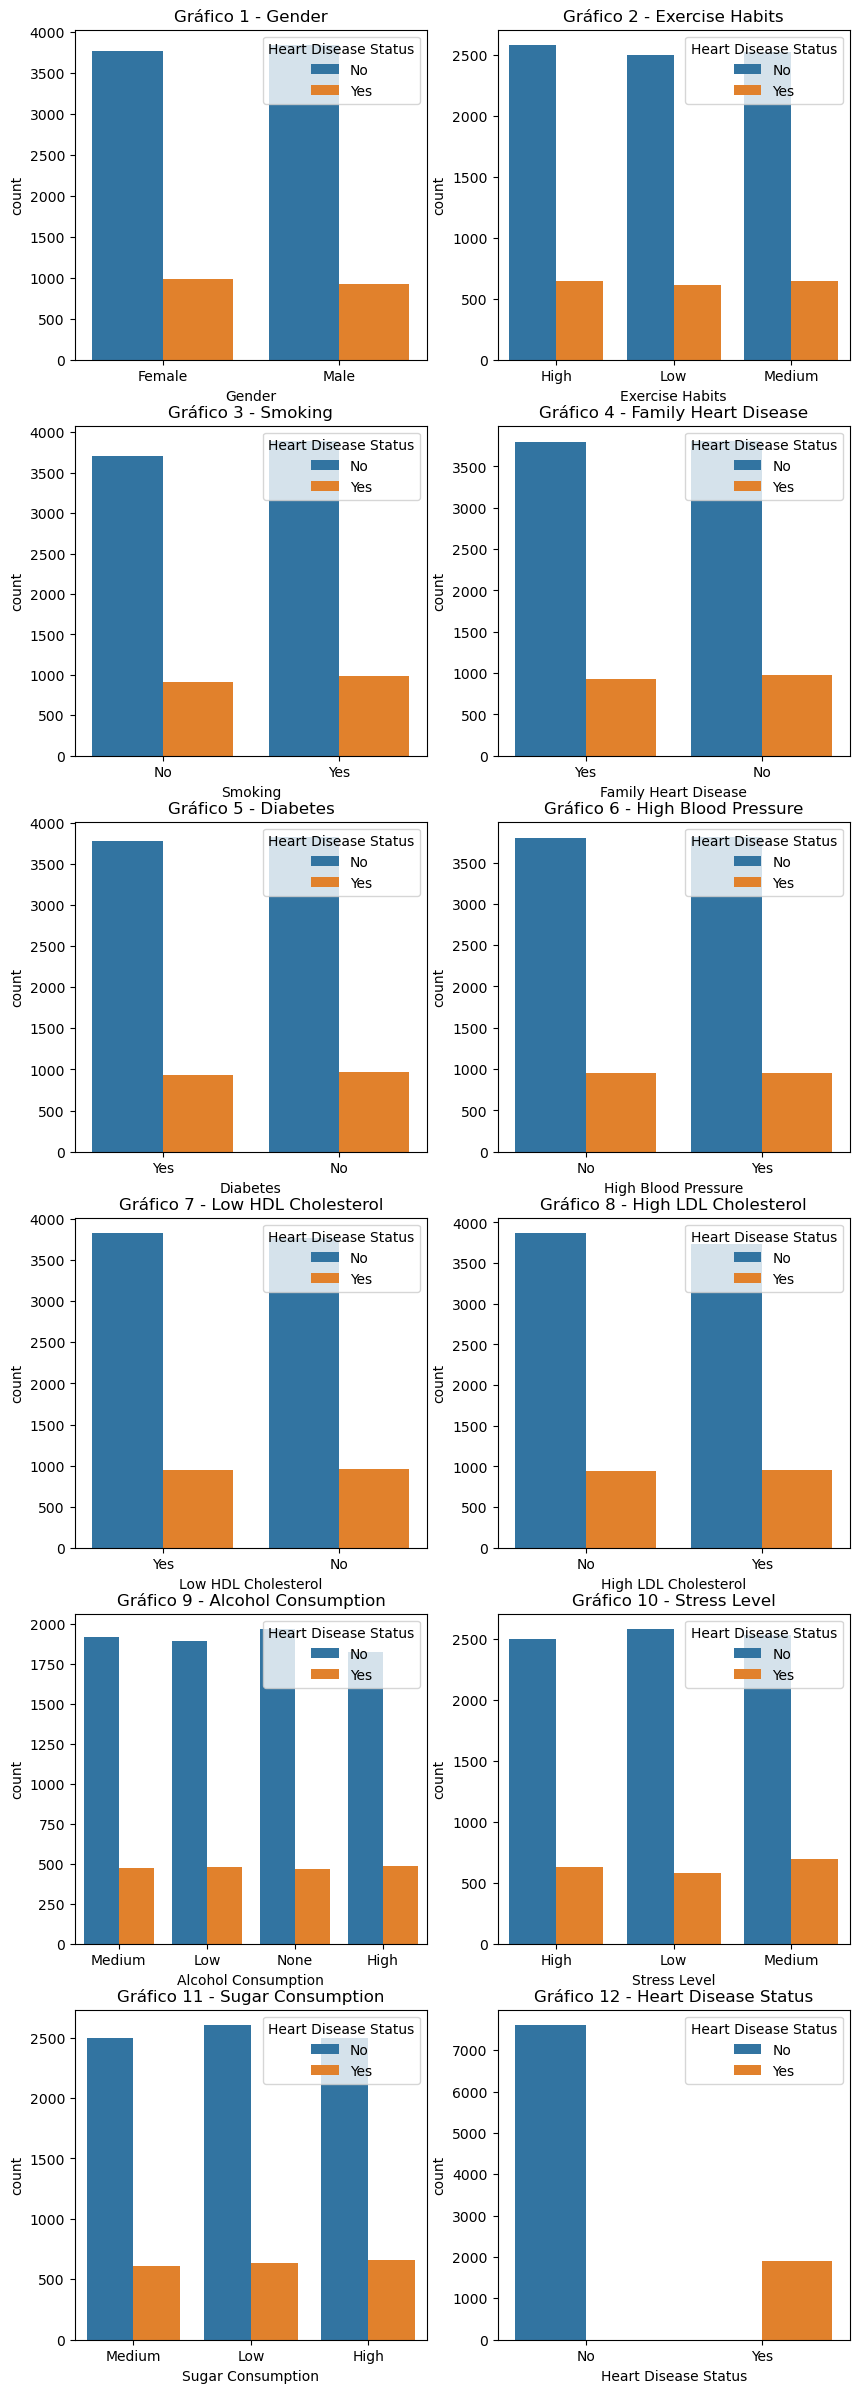

In [8]:
cont = 0
fig, ax = plt.subplots(6,2,figsize = (10,30))

for i in range(12):
    plt.subplot(6,2,i+1)
    sns.countplot(data = colunas_categoricas, x = colunas_categoricas.columns[i],
                 hue = "Heart Disease Status")
    cont+= 1
    plt.title("Gráfico " + str(cont) + " - " + colunas_categoricas.columns[i])

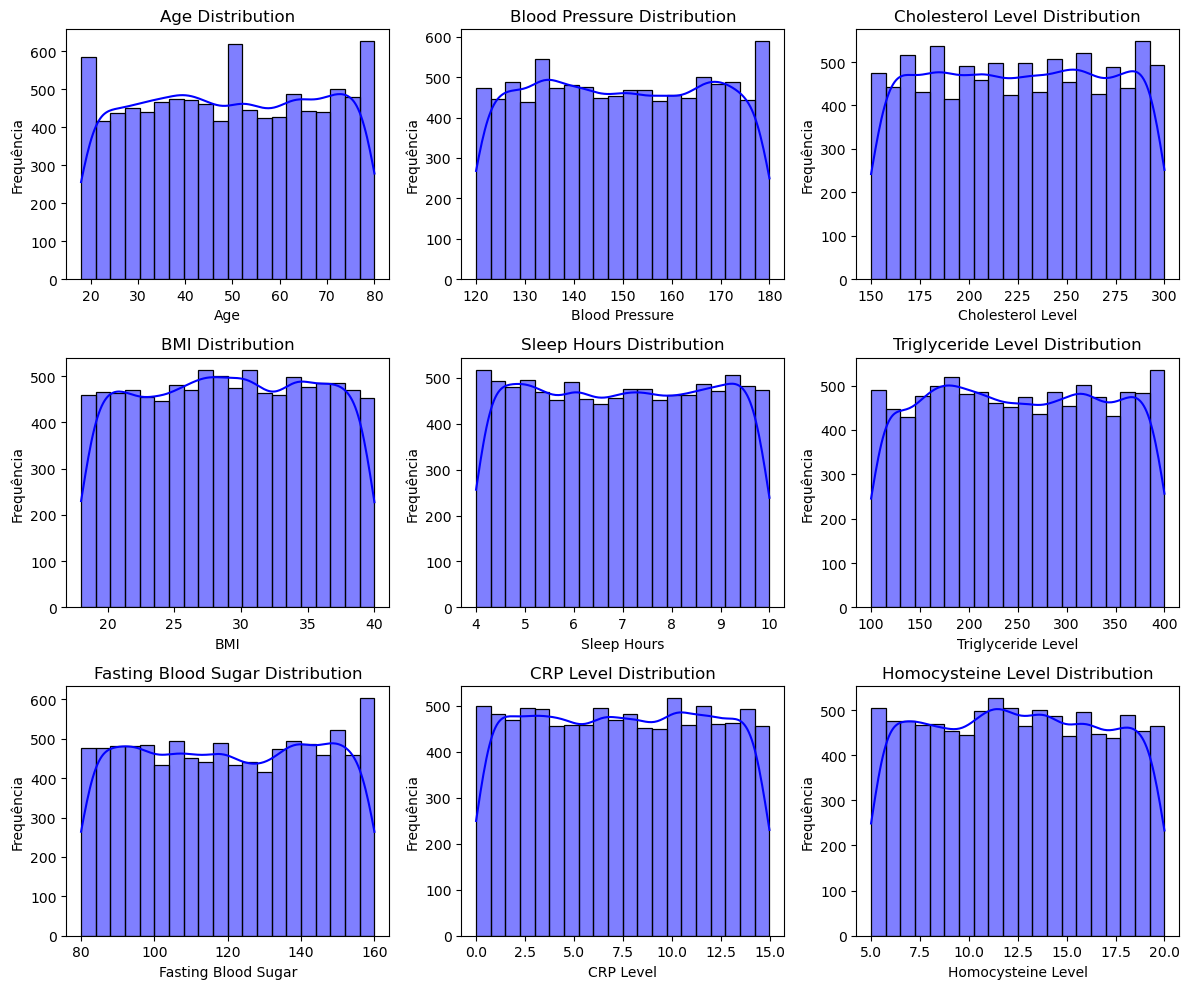

In [13]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(colunas_numericas, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(df[col], kde=True, color="blue", bins=20)  
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

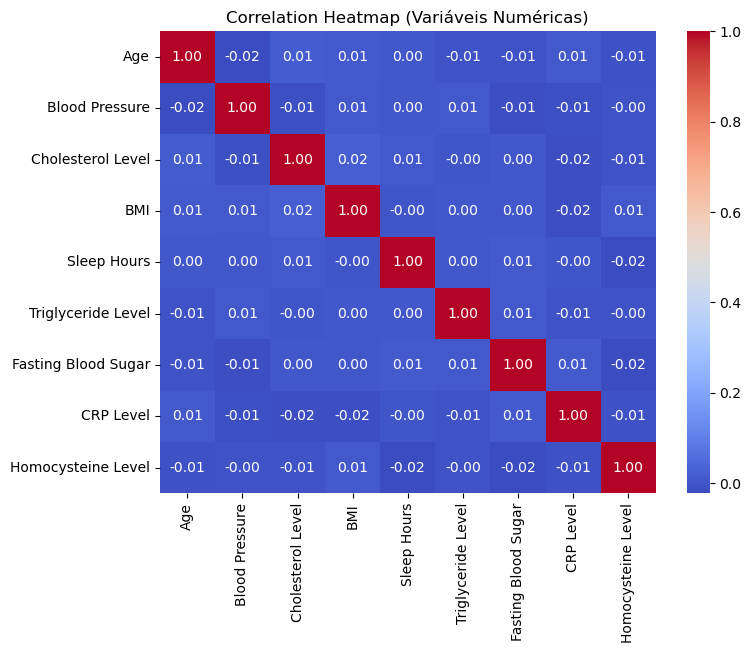

In [10]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    colunas_numericas.corr(), 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f"
)
plt.title("Correlation Heatmap (Variáveis Numéricas)")
plt.show()

# Conclusão da Análise

A análise exploratória dos dados (EDA) sobre doenças cardiovasculares revelou padrões e insights importantes relacionados às condições de saúde e fatores de risco dos pacientes. Os principais achados incluem:

- **Distribuição etária e fatores de risco:** A maioria dos pacientes analisados encontra-se na faixa etária de 34 a 65 anos, com tendência ao aumento da incidência de doenças cardiovasculares conforme a idade avança.
- **Pressão arterial e colesterol:** Pacientes com pressão arterial elevada e altos níveis de colesterol apresentaram maior propensão para desenvolver doenças cardiovasculares.
- **Estilo de vida e hábitos:** Fatores como tabagismo, consumo de álcool, sedentarismo e altos níveis de estresse estão fortemente correlacionados com a presença de doenças cardiovasculares.
- **Indicadores clínicos:** Altos níveis de triglicerídeos e proteína C reativa (CRP) mostraram-se bons indicadores para a detecção de riscos cardiovasculares.

Esta análise fornece um entendimento inicial dos fatores que impactam a incidência de doenças do coração, podendo servir de base para estudos futuros e a formulação de estratégias preventivas. O próximo passo pode envolver o desenvolvimento de modelos preditivos para auxiliar na classificação de risco dos pacientes.